In [1]:
from pyforest import *
from joblib import dump, load

In [2]:
data = pd.read_csv('data/total load station cleaned.csv')

In [3]:
data

,Unnamed: 0,Hour,Day,Month,Load,Pressure,Relative Humidity,Temperature
0,0,1,1,1,39.7,981.25,42.90,24.485
1,1,2,1,1,38.8,981.05,45.25,24.120
2,2,3,1,1,38.1,980.70,50.90,22.620
3,3,4,1,1,37.7,980.60,55.30,21.435
4,4,5,1,1,38.9,980.95,60.15,20.510
...,...,...,...,...,...,...,...,...
8755,11309,20,31,12,44,980.10,35.80,28.035
8756,11311,21,31,12,40.7,981.05,37.85,26.880
8757,11312,22,31,12,35.2,981.60,40.85,25.695
8758,11313,23,31,12,34.7,981.70,43.25,24.980


In [4]:
data.drop(columns=['Unnamed: 0', 'Temperature'], inplace=True)

In [5]:
data.dropna(axis=0, inplace=True)

In [6]:
data[data['Load'] == 44]

,Hour,Day,Month,Load,Pressure,Relative Humidity


In [7]:
data

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15
...,...,...,...,...,...,...
8755,20,31,12,44,980.10,35.80
8756,21,31,12,40.7,981.05,37.85
8757,22,31,12,35.2,981.60,40.85
8758,23,31,12,34.7,981.70,43.25


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7764 entries, 0 to 8759
Data columns (total 6 columns):
Hour                 7764 non-null int64
Day                  7764 non-null int64
Month                7764 non-null int64
Load                 7764 non-null object
Pressure             7764 non-null float64
Relative Humidity    7764 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 424.6+ KB


In [9]:
data.Load.dtypes

dtype('O')

In [10]:
data.drop(2108, inplace=True) #contained a null so drop

In [11]:
pd.to_numeric(data['Load'])

0       39.7
1       38.8
2       38.1
3       37.7
4       38.9
        ... 
8755    44.0
8756    40.7
8757    35.2
8758    34.7
8759    34.3
Name: Load, Length: 7763, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7763 entries, 0 to 8759
Data columns (total 6 columns):
Hour                 7763 non-null int64
Day                  7763 non-null int64
Month                7763 non-null int64
Load                 7763 non-null object
Pressure             7763 non-null float64
Relative Humidity    7763 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 424.5+ KB


In [13]:
data['Load'] = data['Load'].astype(float)

In [14]:
data.drop(data[data['Load'] == 0].index, inplace=True)

In [15]:
# data[data['Load'] == 0]
data.drop(data[data['Month'] == 11].index, inplace=True)

In [16]:
data.drop(data[data['Month'] == 12].index, inplace=True)

In [17]:
data

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15
...,...,...,...,...,...,...
6296,9,20,9,16.4,982.55,99.65
6297,10,20,9,16.4,983.15,98.45
6298,11,20,9,16.1,983.10,95.20
6299,12,20,9,16.2,982.55,91.30


In [18]:
# data.to_csv('data_after_drops.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6189 entries, 0 to 6300
Data columns (total 6 columns):
Hour                 6189 non-null int64
Day                  6189 non-null int64
Month                6189 non-null int64
Load                 6189 non-null float64
Pressure             6189 non-null float64
Relative Humidity    6189 non-null float64
dtypes: float64(3), int64(3)
memory usage: 338.5 KB


In [20]:
data.head()

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15


In [21]:
sns.heatmap(data.corr(), annot=True)
plt.show()

<Figure size 640x480 with 2 Axes>

In [22]:
features = data[['Hour','Day','Pressure','Month','Relative Humidity']]

In [23]:
label = data[['Load']]

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
features_train, features_test, label_train, label_test = train_test_split(features,label, test_size=0.1, random_state=0)

In [600]:
features_train.shape

(5570, 5)

In [601]:
features_test.shape

(619, 5)

In [602]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# from sklearn
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [736]:
model = LinearRegression()

In [737]:
model.fit(features_train, label_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [738]:
prediction = model.predict(features_test)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [740]:
np.sqrt(mean_squared_error(prediction, label_test))

7.676941047756715

In [741]:
mean_absolute_error(prediction, label_test)

6.276802088231063

In [742]:
score = model.score(features_test, label_test)
score

0.352143135704597

In [361]:
dump(model, 'models/no-temp-rf' + str(np.round(score,2)) + '.joblib')

['models/no-temp-rf0.93.joblib']

### 93% score on test data

In [26]:
model = load('models/no-temp-rf0.93.joblib')

In [27]:
label_test.iloc[2]

Load    24.0
Name: 3738, dtype: float64

In [28]:
model.predict(features_test)[2]

23.069999999999997

In [30]:
# prediction.shape

In [391]:
label_test.shape

(619, 1)

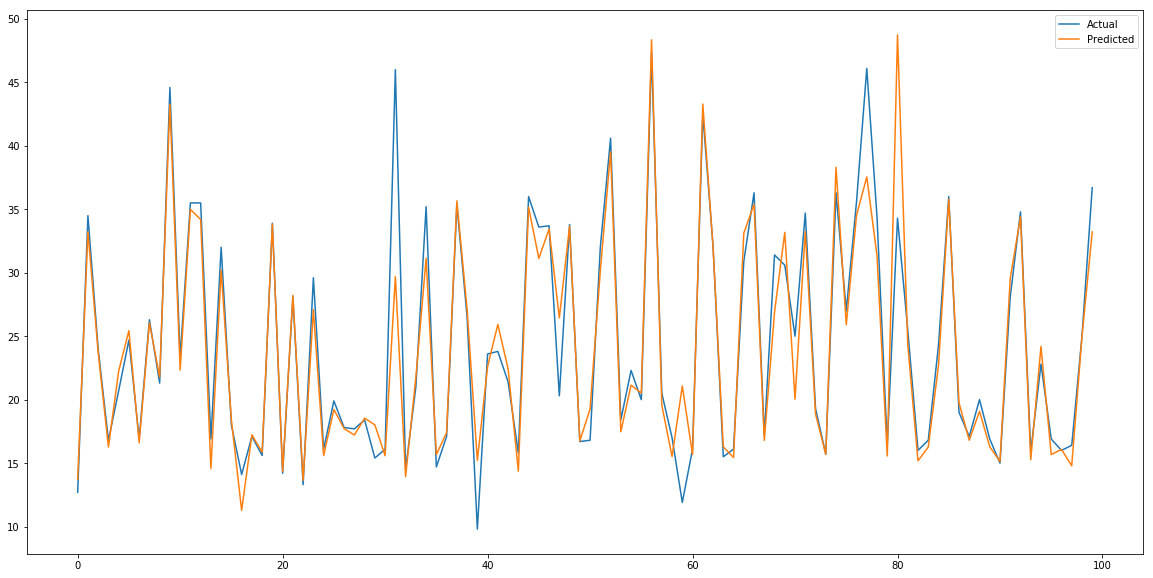

In [406]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(100), label_test['Load'][:100])
plt.plot(np.arange(100),prediction[:100])
plt.legend(['Actual','Predicted'])
plt.show()

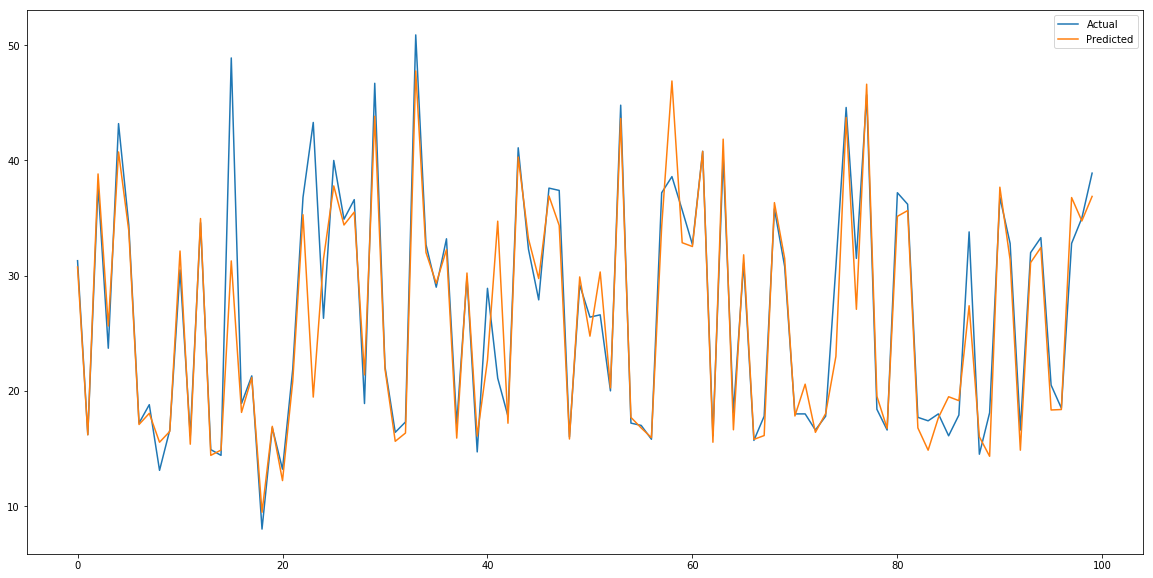

In [407]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(100), label_test['Load'][100:200])
plt.plot(np.arange(100),prediction[100:200])
plt.legend(['Actual','Predicted'])
plt.show()

In [410]:
#evaluation on the whole dataset
np.sqrt(mean_squared_error(model.predict(features), label))

1.5105388594217741

In [413]:
model.score(features, label)

0.9757109753741637

In [37]:
# train, test = train_test_split(features, label)
test_data = features_test
test_data['Load'] = label_test

/home/ghaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
test_data

,Hour,Day,Pressure,Month,Relative Humidity,Load
4424,9,4,982.70,7,91.20,12.7
3578,3,30,979.30,5,93.75,34.5
3738,19,5,979.25,6,74.45,24.0
5724,13,27,983.50,8,75.25,16.8
4676,21,14,981.50,7,92.45,20.7
...,...,...,...,...,...,...
5429,6,15,982.75,8,95.60,18.0
961,2,10,977.95,2,62.20,38.4
2714,3,24,984.00,4,96.80,34.6
790,23,2,981.95,2,89.90,31.1


### Evaluating Predictions for First Eight Hours

In [39]:
firstEightHoursData = test_data[test_data['Hour'] <= 8 ]


In [40]:
firstEightHoursData

,Hour,Day,Pressure,Month,Relative Humidity,Load
3578,3,30,979.30,5,93.75,34.5
4252,5,27,982.35,6,93.95,16.9
1060,5,14,979.85,2,45.80,35.5
1009,2,12,978.75,2,35.30,35.5
267,4,12,978.05,1,78.80,33.9
...,...,...,...,...,...,...
2982,7,5,979.25,5,98.45,29.7
76,5,4,979.60,1,58.20,31.3
5429,6,15,982.75,8,95.60,18.0
961,2,10,977.95,2,62.20,38.4


In [41]:
firstEightHoursFeatures = firstEightHoursData[['Hour', 'Day','Pressure','Month','Relative Humidity']]
firstEightHoursFeatures

,Hour,Day,Pressure,Month,Relative Humidity
3578,3,30,979.30,5,93.75
4252,5,27,982.35,6,93.95
1060,5,14,979.85,2,45.80
1009,2,12,978.75,2,35.30
267,4,12,978.05,1,78.80
...,...,...,...,...,...
2982,7,5,979.25,5,98.45
76,5,4,979.60,1,58.20
5429,6,15,982.75,8,95.60
961,2,10,977.95,2,62.20


In [42]:
firstEightHoursLabels = firstEightHoursData[['Load']]
firstEightHoursLabels

,Load
3578,34.5
4252,16.9
1060,35.5
1009,35.5
267,33.9
...,...
2982,29.7
76,31.3
5429,18.0
961,38.4


In [43]:
firstEightHoursLabels.iloc[0]

Load    34.5
Name: 3578, dtype: float64

In [45]:
firstEightHoursFeatures.iloc[0]

Hour                   3.00
Day                   30.00
Pressure             979.30
Month                  5.00
Relative Humidity     93.75
Name: 3578, dtype: float64

In [47]:
model.predict([firstEightHoursFeatures.iloc[0]])

array([32.56])

In [48]:
model.score(firstEightHoursFeatures, firstEightHoursLabels)

0.9386161613323505

### 93.9% accuracy for hours between 12am and 8am

In [51]:
np.sqrt(mean_squared_error(model.predict(firstEightHoursFeatures), firstEightHoursLabels))

2.1724063879861673

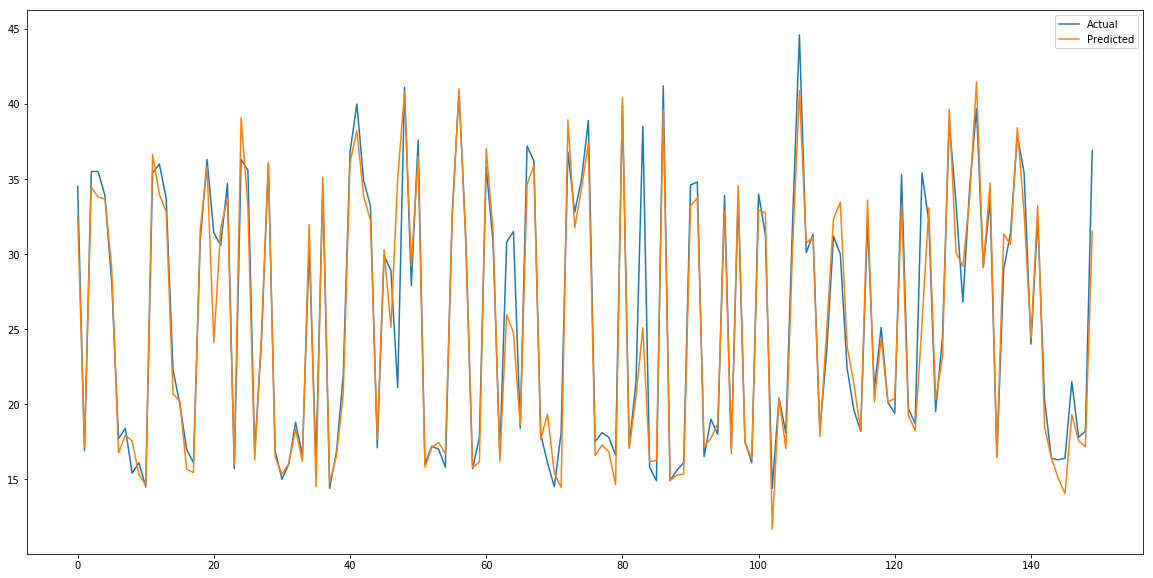

In [52]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(150), firstEightHoursLabels['Load'][:150])
plt.plot(np.arange(150),model.predict(firstEightHoursFeatures)[:150])
plt.legend(['Actual','Predicted'])
plt.show()

## Evaluating predictions for second eight hours

In [53]:
secondEightHoursData = test_data[test_data['Hour'] <= 16]
secondEightHoursData = secondEightHoursData[secondEightHoursData['Hour'] > 8]
secondEightHoursData

,Hour,Day,Pressure,Month,Relative Humidity,Load
4424,9,4,982.70,7,91.20,12.7
5724,13,27,983.50,8,75.25,16.8
6061,14,10,981.90,9,80.10,16.9
565,14,24,978.00,1,51.80,32.0
4592,9,11,983.80,7,96.05,14.1
...,...,...,...,...,...,...
2078,15,28,977.60,3,50.05,17.2
6014,15,8,982.50,9,90.75,14.5
4599,16,11,980.85,7,74.80,15.2
2820,13,28,985.05,4,67.10,30.9


In [54]:
secondEightHoursFeatures = secondEightHoursData[['Hour', 'Day','Pressure','Month','Relative Humidity']]
secondEightHoursFeatures

,Hour,Day,Pressure,Month,Relative Humidity
4424,9,4,982.70,7,91.20
5724,13,27,983.50,8,75.25
6061,14,10,981.90,9,80.10
565,14,24,978.00,1,51.80
4592,9,11,983.80,7,96.05
...,...,...,...,...,...
2078,15,28,977.60,3,50.05
6014,15,8,982.50,9,90.75
4599,16,11,980.85,7,74.80
2820,13,28,985.05,4,67.10


In [55]:
secondEightHoursLabels = secondEightHoursData[['Load']]
secondEightHoursLabels

,Load
4424,12.7
5724,16.8
6061,16.9
565,32.0
4592,14.1
...,...
2078,17.2
6014,14.5
4599,15.2
2820,30.9


In [56]:
secondEightHoursFeatures = secondEightHoursData[['Hour', 'Day','Pressure','Month','Relative Humidity']]
secondEightHoursFeatures

,Hour,Day,Pressure,Month,Relative Humidity
4424,9,4,982.70,7,91.20
5724,13,27,983.50,8,75.25
6061,14,10,981.90,9,80.10
565,14,24,978.00,1,51.80
4592,9,11,983.80,7,96.05
...,...,...,...,...,...
2078,15,28,977.60,3,50.05
6014,15,8,982.50,9,90.75
4599,16,11,980.85,7,74.80
2820,13,28,985.05,4,67.10


In [58]:
secondEightHoursLabels = secondEightHoursData[['Load']]
secondEightHoursLabels

,Load
4424,12.7
5724,16.8
6061,16.9
565,32.0
4592,14.1
...,...
2078,17.2
6014,14.5
4599,15.2
2820,30.9


In [59]:
model.score(secondEightHoursFeatures, secondEightHoursLabels)

0.9398136370429211

In [691]:
# model.score(secondEightHoursFeatures, secondEightHoursLabels)

0.9729103495877904

### 94% accuracy for hours between 8am and 4pm

In [60]:
np.sqrt(mean_squared_error(model.predict(secondEightHoursFeatures), secondEightHoursLabels))

1.84452172296057

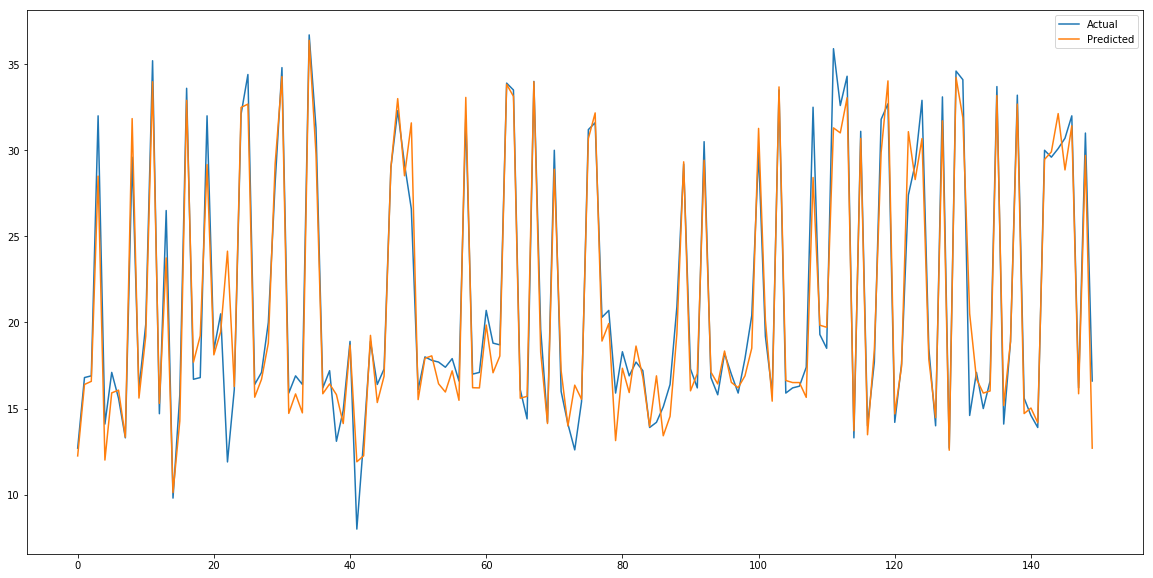

In [61]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(150), secondEightHoursLabels['Load'][:150])
plt.plot(np.arange(150),model.predict(secondEightHoursFeatures)[:150])
plt.legend(['Actual','Predicted'])
plt.show()

## Evaluating predictions for the third eight hours

In [62]:
thirdEightHoursData = test_data[test_data['Hour'] <= 24]
thirdEightHoursData = thirdEightHoursData[thirdEightHoursData['Hour'] > 16]
thirdEightHoursData

,Hour,Day,Pressure,Month,Relative Humidity,Load
3738,19,5,979.25,6,74.45,24.0
4676,21,14,981.50,7,92.45,20.7
2036,21,26,977.95,3,59.15,24.7
2012,21,25,978.90,3,67.30,26.3
5754,19,28,979.95,8,81.40,21.3
...,...,...,...,...,...,...
5896,17,3,979.50,9,64.55,18.1
1173,22,18,978.85,2,65.70,48.2
3450,19,24,978.15,5,76.90,44.5
407,24,17,979.90,1,64.85,39.7


In [63]:
thirdEightHoursFeatures = thirdEightHoursData[['Hour', 'Day','Pressure','Month','Relative Humidity']]
thirdEightHoursFeatures

,Hour,Day,Pressure,Month,Relative Humidity
3738,19,5,979.25,6,74.45
4676,21,14,981.50,7,92.45
2036,21,26,977.95,3,59.15
2012,21,25,978.90,3,67.30
5754,19,28,979.95,8,81.40
...,...,...,...,...,...
5896,17,3,979.50,9,64.55
1173,22,18,978.85,2,65.70
3450,19,24,978.15,5,76.90
407,24,17,979.90,1,64.85


In [64]:
thirdEightHoursLabel = thirdEightHoursData[['Load']]
thirdEightHoursLabel

,Load
3738,24.0
4676,20.7
2036,24.7
2012,26.3
5754,21.3
...,...
5896,18.1
1173,48.2
3450,44.5
407,39.7


In [65]:
model.score(thirdEightHoursFeatures, thirdEightHoursLabel)

0.8857615492933725

## 88.6% accuracy for hours between 4pm and 12am

In [66]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestRegressor
# from joblib import dump, load
# from sklearn.preprocessing import MinMaxScaler

In [67]:
np.sqrt(mean_squared_error(model.predict(thirdEightHoursFeatures), thirdEightHoursLabel))

3.5077911203048164

In [710]:
# kf = KFold(n_splits=5)

In [711]:
# rf_reg = RandomForestRegressor()

In [712]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# features = scaler.fit_transform(features)

In [713]:
# scores = []
# # for train_index, test_index in kf.split(features):
# # #     X_train, X_test, y_train, y_test = features[train_index],features[test_index],label[train_index], label[test_index]
# #     X_train, X_test = features[train_index], features[test_index] 
# #     y_train, y_test = label[train_index], y[test_index]
# #     rf_reg.fit(X_train, y_train)
# #     scores.append(rf_reg.score(X_test,y_test))
# for i in range(5):
#     result = next(kf.split(features_train), None)
#     x_train = data.iloc[result[0]]
#     x_test = data.iloc[result[1]]
#     y_train = data.iloc[result[0]]
#     y_test = data.iloc[result[1]]
#     model = rf_reg.fit(x_train,y_train)
#     prediction = model.predict(x_test)
#     scores.append(model.score(x_test, y_test))
#     dump(model, 'cross-val-models/model(' + str(model.score(x_test,y_test)) + ').joblib')
    
# print(scores)
# print(np.mean(scores))

In [ ]:
# new_model = load('cross-val-models/model(0.9371683413307422).joblib')

In [ ]:
# np.sqrt(mean_squared_error(new_model.predict(features_test), label_test))